In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

reading the data set 

In [2]:
%%time
images=[]
for dirname, _, filenames in os.walk('D:/semester_7/project1/cityScape2-wb/Input/Train/aachen'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename))
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
        
        images.append(res)
for dirname, _, filenames in os.walk('D:/semester_7/project1/cityScape2-wb/Input/Train/bochum'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename))
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
        
        images.append(res)
for dirname, _, filenames in os.walk('D:/semester_7/project1/cityScape2-wb/Input/Train/bremen'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename))
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
        
        images.append(res)
for dirname, _, filenames in os.walk('D:/semester_7/project1/cityScape2-wb/Input/Train/cologne'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename))
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
        
        images.append(res)

for dirname, _, filenames in os.walk('D:/semester_7/project1/cityScape2-wb/Input/Train/darmstadt'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename))
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
        
        images.append(res)

Wall time: 2min 19s


In [3]:
%%time
masksg=[]
for dirname, _, filenames in os.walk('D:/semester_7/project1/cityScape2-wb/Reference/gtFine/Train/aachen'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename),0)
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
       # img3gs = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        masksg.append(res)
        
for dirname, _, filenames in os.walk('D:/semester_7/project1/cityScape2-wb/Reference/gtFine/Train/bochum'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename),0)
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
    #    img3gs = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        masksg.append(res)
        
for dirname, _, filenames in os.walk('D:/semester_7/project1/cityScape2-wb/Reference/gtFine/Train/bremen'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename),0)
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
       # img3gs = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        masksg.append(res)
        
for dirname, _, filenames in os.walk('D:/semester_7/project1/cityScape2-wb/Reference/gtFine/Train/cologne'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename),0)
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
       # img3gs = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        masksg.append(res)
        
for dirname, _, filenames in os.walk('D:/semester_7/project1/cityScape2-wb/Reference/gtFine/Train/darmstadt'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename),0)
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
       # img3gs = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        masksg.append(res)
        

Wall time: 1min 18s


825
Wall time: 437 ms


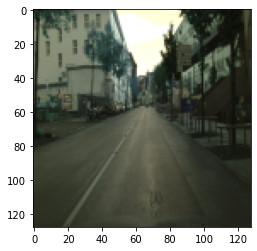

In [4]:
%%time
print(len(images))
plt.imshow(images[len(images)-1])

825
Wall time: 18 ms


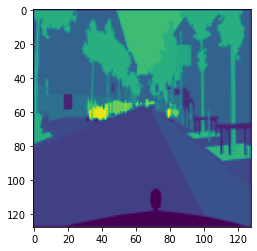

In [5]:
%%time
print(len(masksg))
plt.imshow(masksg[len(masksg)-1])

In [6]:
%%time
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras import utils as u
from keras import losses, optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
import multiprocessing
from skimage.util import random_noise, img_as_float
from keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

Wall time: 1min 50s


building the model 

In [7]:
%%time
IMAGE_ORDERING = 'channels_last'
n_classes=35

inputs = Input((128, 128, 3))
s = Lambda(lambda x: x / 255) (inputs)

x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1', data_format=IMAGE_ORDERING )(s)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2', data_format=IMAGE_ORDERING )(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool', data_format=IMAGE_ORDERING )(x)
f1 = x
# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1', data_format=IMAGE_ORDERING )(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2', data_format=IMAGE_ORDERING )(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool', data_format=IMAGE_ORDERING )(x)
f2 = x

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1', data_format=IMAGE_ORDERING )(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2', data_format=IMAGE_ORDERING )(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3', data_format=IMAGE_ORDERING )(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool', data_format=IMAGE_ORDERING )(x)
f3 = x
pred3= Conv2DTranspose( n_classes , kernel_size=(16,16) ,  strides=(16,16) , use_bias=False ,  data_format=IMAGE_ORDERING )(f3)

# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1', data_format=IMAGE_ORDERING )(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2', data_format=IMAGE_ORDERING )(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3', data_format=IMAGE_ORDERING )(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool', data_format=IMAGE_ORDERING )(x)
f4 = x

pred4= Conv2DTranspose( n_classes , kernel_size=(32,32) ,  strides=(32,32) , use_bias=False ,  data_format=IMAGE_ORDERING )(f4)

# Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1', data_format=IMAGE_ORDERING )(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2', data_format=IMAGE_ORDERING )(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3', data_format=IMAGE_ORDERING )(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool', data_format=IMAGE_ORDERING )(x)
f5 = x
pred5= Conv2DTranspose( n_classes , kernel_size=(64,64) ,  strides=(64,64) , use_bias=False ,  data_format=IMAGE_ORDERING )(f5)


o = Add(name="add")([pred3, pred4, pred5])

o = MaxPooling2D((2, 2), strides=(2, 2), name='final', data_format=IMAGE_ORDERING )(o)
o = ( Conv2D( n_classes ,  ( 1 , 1 ) ,kernel_initializer='he_normal' , data_format=IMAGE_ORDERING))(o)
#o = Conv2DTranspose( n_classes , kernel_size=(32,32) ,  strides=(32,32) , use_bias=False ,  data_format=IMAGE_ORDERING )(o)
    
o = (Activation('softmax'))(o)
model = Model([inputs] , [o] )
model.compile(#  loss biinary hatet8iar
            loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 128, 128, 64  1792        ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

training the model 

In [8]:
%%time
results = model.fit(np.asarray(images), to_categorical(np.asarray(masksg), num_classes=35), 
 steps_per_epoch=25,#len(X_train) // BS
epochs=50,workers=multiprocessing.cpu_count(),validation_split=0.3)

Epoch 1/50
25/25 [==============================] - 564s 19s/step - loss: 0.4441 - accuracy: 0.0925 - val_loss: 0.1248 - val_accuracy: 0.2521 - ETA:
Epoch 2/50
25/25 [==============================] - 381s 15s/step - loss: 0.0936 - accuracy: 0.4403 - val_loss: 0.0743 - val_accuracy: 0.5424
Epoch 3/50
25/25 [==============================] - 381s 15s/step - loss: 0.0665 - accuracy: 0.5419 - val_loss: 0.0704 - val_accuracy: 0.5563
Epoch 4/50
25/25 [==============================] - 383s 15s/step - loss: 0.0632 - accuracy: 0.5536 - val_loss: 0.0647 - val_accuracy: 0.5674
Epoch 5/50
25/25 [==============================] - 380s 15s/step - loss: 0.0613 - accuracy: 0.5575 - val_loss: 0.0641 - val_accuracy: 0.5672
Epoch 6/50
25/25 [==============================] - 380s 15s/step - loss: 0.0609 - accuracy: 0.5615 - val_loss: 0.0643 - val_accuracy: 0.5682
Epoch 7/50
25/25 [==============================] - 381s 15s/step - loss: 0.0602 - accuracy: 0.5683 - val_loss: 0.0638 - val_accuracy: 0.5794

In [14]:
model.save('cityscapessss.h5')

C:\Users\El.Sa7er\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
results.history['accuracy']

visualizing the accuracy results 

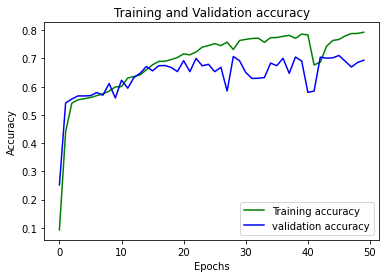

In [9]:
acc_train = results.history['accuracy']
acc_val = results.history['val_accuracy']
epochs = range(0,50)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

visualizing the accuracy results 

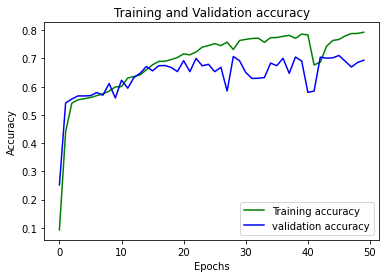

<Figure size 432x288 with 0 Axes>

In [15]:
acc_train = results.history['accuracy']
acc_val = results.history['val_accuracy']
epochs = range(0,50)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('accuracy.png')

In [ ]:
visualizing the loss results 

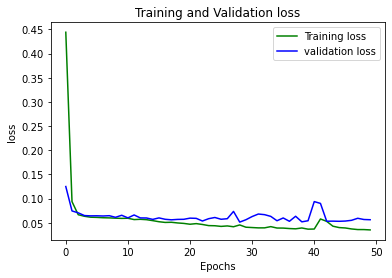

In [10]:
loss_train = results.history['loss']
loss_val = results.history['val_loss']
epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
import visualkeras

visualizing built model

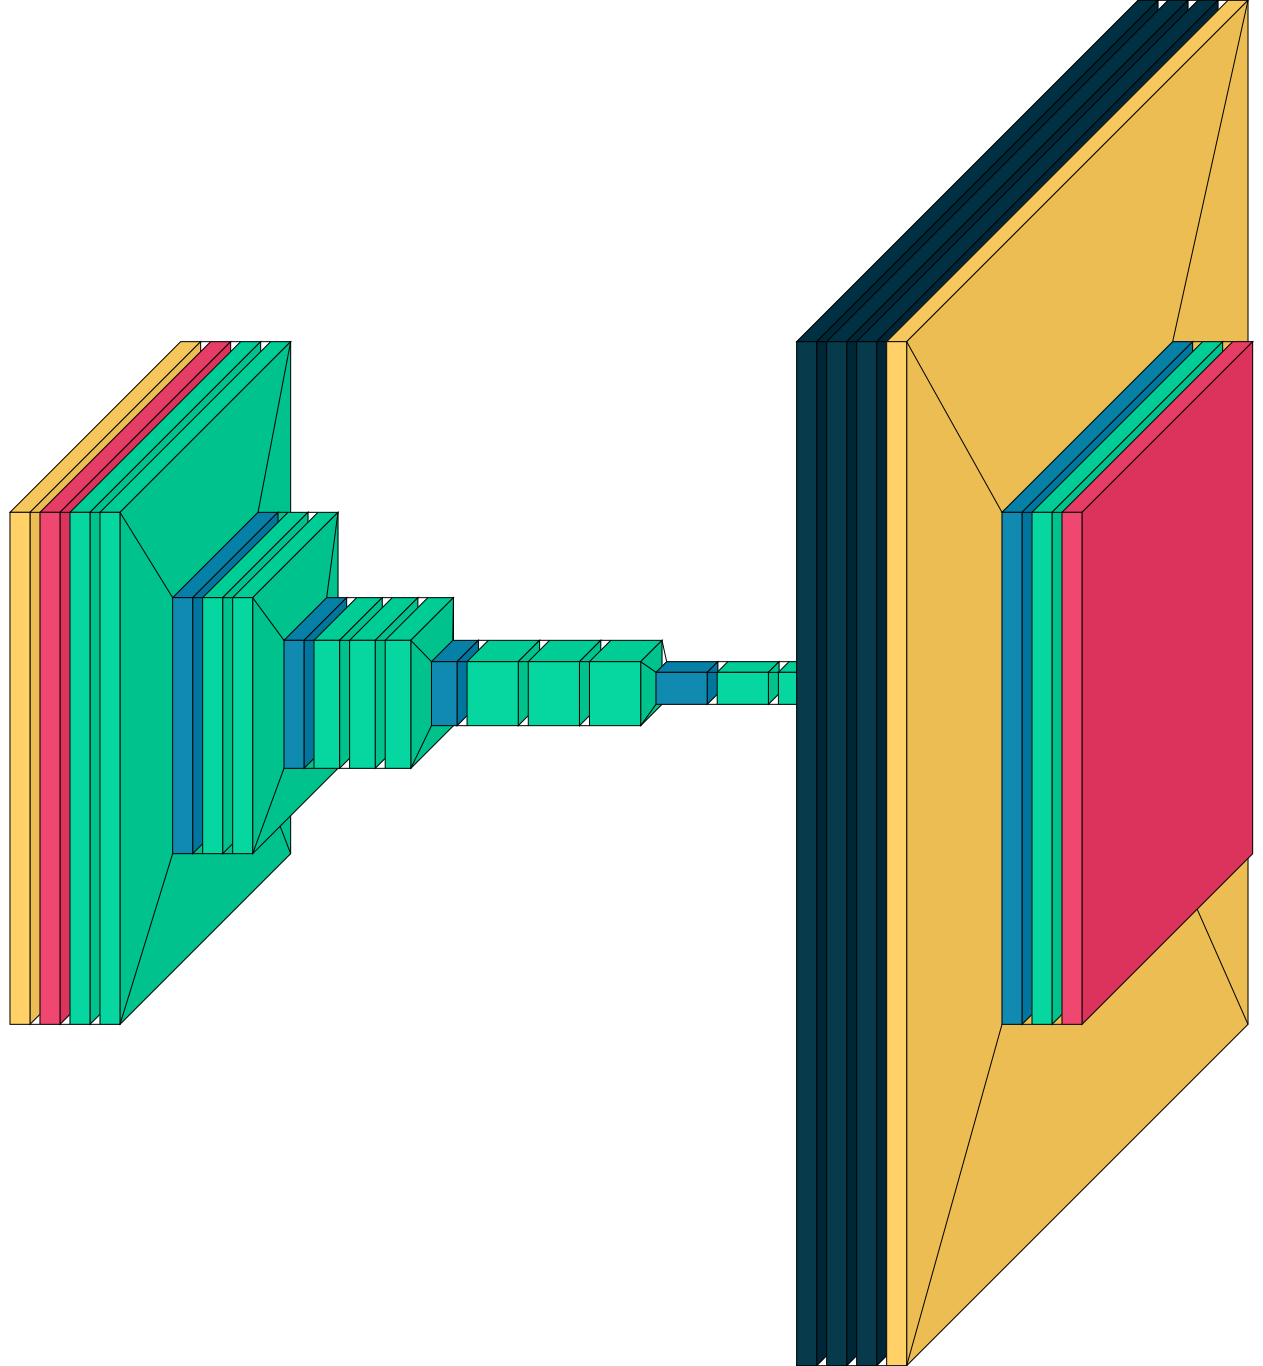

In [12]:
visualkeras.layered_view(model) 

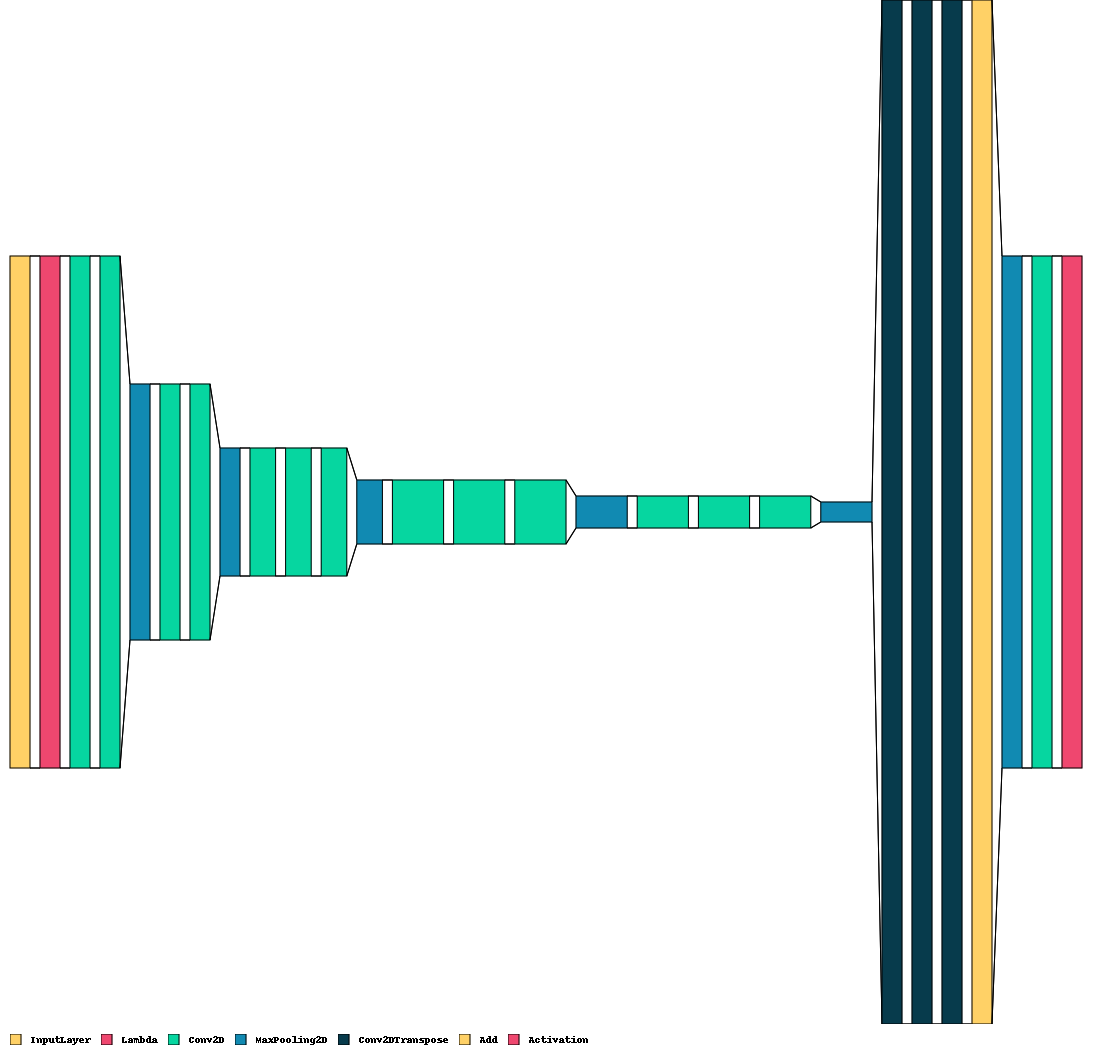

In [13]:
visualkeras.layered_view(model, legend=True, draw_volume=False) 